In [1]:

import requests

import bs4 as bs
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# def get_wikitable_source(url, only_first_instance = True):
#     """Takes in a wiki page url and outputs the table page source code.
#     Only outputs the first instance unless only_first_instance
#     is set to false then outputs all instances of tables as a list.
    
#     Parameters
#     ----------
#     url : string
#         Website url that will have the page source code returned
        
#     only_first_instance : Boolean
#         defaults to True, if set to false takes all tables from
#         the wiki page.
    
#     Returns
#     -------
    
#     table : wikitable source code"""
#     # Gets webpage source code which will soon be spliced
#     page_source = requests.get(url).text 
#     parsed_source = bs.BeautifulSoup(page_source,'lxml')
    
#     # Finds all instance of HTML "table" tags with the class "wikitable sortable" and returns as a list
#     if only_first_instance:
#         table = parsed_source.find("table", {"class":"wikitable sortable"} )
#     else:
#         table = parsed_source.findAll("table", {"class":"wikitable sortable"} )
#     return table

In [3]:
def get_wikitable_source(url, only_first_instance = True):
    """Takes in a wiki page url and outputs the table page source code.
    Only outputs the first instance unless only_first_instance
    is set to false then outputs all instances of tables as a list.
    
    Parameters
    ----------
    url : string
        Website url that will have the page source code returned
        
    only_first_instance : Boolean
        defaults to True, if set to false takes all tables from
        the wiki page.
    
    Returns
    -------
    
    table : wikitable source code"""
    # Gets webpage source code which will soon be spliced
    page_source = requests.get(url).text 
    parsed_source = bs.BeautifulSoup(page_source,'lxml')
    
    # Finds only first instance of HTML "table" tags with the class "wikitable sortable" and returns as a list
    if only_first_instance:
        table = parsed_source.find("table", {"class":"wikitable sortable"} )
    # Finds all instance of HTML "table" tags with the class "wikitable sortable" and returns as a list
    else:
        table = parsed_source.findAll("table", {"class":"wikitable sortable"} )
    return table

In [4]:
# def sort_wikitable_column(wikitable_source, column):
#     """Takes in wikitable sorce code as a bs4 element list or singular object and stores the column number inputted.
        
#          Parameters
#         ----------
#         wikitable_source : bs4 element
#             Takes in wikitable sorce code as a bs4 element list or singular object
        
    
#         Returns
#         -------
    
#         table_column : list
#             returns the table column as a list"""
#     table_column = []
    
#     #for table in wikitable_source:
#         # looping through the individual rows of each table skipping the header
#     for row in wikitable_source.findAll("tr")[1:]: 
#         # takes solely the text of the column and removes excessive characters like \n
#         table_column.append(row.findAll("td")[column].text.strip())
     
#     return table_column


In [5]:
def sort_wikitable_column(wikitable_source, column):
    """Takes in a single wikitable sorce code as a bs4 element list or singular object and stores the column number    inputted.
        
         Parameters
        ----------
        wikitable_source : bs4 element
            Takes in wikitable sorce code as a single bs4 element list 
        
    
        Returns
        -------
    
        table_column : list
            returns the table column as a list"""
    table_column = []    
    
    # looping through the individual rows of the table skipping the header
    for row in wikitable_source.findAll("tr")[1:]: 
       
        # takes solely the text of the column and removes excessive characters like \n
        table_column.append(row.findAll("td")[column].text.strip())

    return table_column

In [6]:
# def US_census_data(current_year):
#     """collects US_census_data by scraping every census wikipage from 1790 to the
#     current year minus"""
    
#     city_list = []
    
#     # Note that the for loop stops before current_year, as the data for that year isn't complete
#     # The census is taken every 10 years which is why we have a step size of 10
#     for year in range(1790, current_year, 10):
#         # adjusting the wikipedia link to get the data from
#         url = 'https://en.wikipedia.org/wiki/%s_United_States_Census' % (year) 
#         tables = get_wikitable_source(url, only_first_instance = False) 
        
#         if year == 1790:
#             # on every census wikipage, the last table is the City Rank table
#             city = sort_wikitable_column(tables[-1], 1)
#             state = sort_wikitable_column(tables[-1], 2)
            
#             for pair in zip(city, state):                
#                 city_list.append(CityPopulation(*pair))
                
#         # census 1870 has differing HTML formatting which otherwise breaks the code
#         # Must skip this year as the HTML on this page labels the tabel as wikitable sortable mw-collapsible
#         if year != 1870:
#             city = sort_wikitable_column(tables[-1], 1)
#             state = sort_wikitable_column(tables[-1], 2)
#             population = sort_wikitable_column(tables[-1],3)
            
#             for info in zip(city, state, population):
#                 temp = None
                
#                 for place in city_list:
                    
#                     if place.getcity().lower() == info[0].lower():
#                         place.addpopulation({info[2]:year})
#                         temp=None
#                         break
                        
#                     else:
                        
#                         temp = CityPopulation(*info, year)
#                 if temp!=None:  
#                     city_list.append(temp)
           
#     return city_list



In [7]:
def US_census_data(current_year):
    """collects US_census_data by scraping every census wikipage from 1790 to before
    current year
    
    Parameters
    ----------
    current_year : int or string
    The year you want to collect census data to
    (Note that census data is taken every 10 years and when inputting a year 
    divisable by 10 such as 2010 then it will stop the year before and only get data from 1790-2000)
    
    Returns
    -------
    city_list : list of CityPopulation objects
    The City Population class stores City, State, as strings 
    and Population:Year as a dictionary. It is an organized way
    to access the census data"""
    
    city_list = []
    
    # Note that the for loop stops before current_year, as the data for that year isn't complete
    # The census is taken every 10 years which is why we have a step size of 10
    for year in range(1790, current_year, 10):
        # adjusting the wikipedia link to get the data from
        url = 'https://en.wikipedia.org/wiki/%s_United_States_Census' % (year) 
        tables = get_wikitable_source(url, only_first_instance = False) 
        
        if year == 1790:
            # on every census wikipage, the last table is the City Rank table
            city = sort_wikitable_column(tables[-1], 1)
            state = sort_wikitable_column(tables[-1], 2)
            
            for pair in zip(city, state):                
                city_list.append(CityPopulation(*pair))
                
        # census 1870 has differing HTML formatting which otherwise breaks the code
        # Must skip this year as the HTML on this page labels the table wrong
        if year != 1870:
            # If I do the sort_wikitable_column before my if statements then it will cause an error
            # due to the function running for 1870 and bugging out
            city = sort_wikitable_column(tables[-1], 1)
            state = sort_wikitable_column(tables[-1], 2)
            population = sort_wikitable_column(tables[-1],3)
            
            for info in zip(city, state, population):
                temp = None
                
                for place in city_list:
                    # if the city is in the city list then adding to the dictionary population:year aspec
                    if place.getcity().lower() == info[0].lower():
                        place.addpopulation({info[2]:year})
                        temp=None
                        break
                        
                        
                    # This else statement is incase the city is not in the city_list then it will be added    
                    else:
                        temp = CityPopulation(*info, year)
                # adding the city that isn't in the city list        
                if temp!=None:  
                    city_list.append(temp)
           
    return city_list



In [8]:
# class CityPopulation():
#     """Class that stores the ciy and state and the population/year
#     as a key value pair. Easy way to sort the information collected
#     from webscraping."""
#     def __init__(self, city, state, population = None, year = None):
#         self.city = city
#         self.state = state
#         self.populationdict = {}
#         if population!=None and year!=None:
#             self.addpopulation({population:year})
#     def __repr__(self):
#         return self.city + '-' + self.state  
        
#     def addpopulation(self, dictionary):
#         self.populationdict.update(dictionary)
    
#     def getcity(self):
#         return self.city
    
#     def getpop(self):
#         return self.populationdict
    
#     def getinfo(self):
#         return [self.city, self.state, self.populationdict]

In [29]:
class CityPopulation():
    """Class that stores the ciy and state and the population/year
    as a key value pair. Easy way to sort the information collected
    from webscraping."""
    # requires taking in a city and state for the initial set up, 
    # and I added the functionality to take in a population and year for flexibility
    def __init__(self, city, state, population = None, year = None):
        self.city = city
        self.state = state
        self.populationdict = {}
        if population!=None and year!=None:
            self.addpopulation({population:year})
    # Overloading the printed representation of object for easier readability        
    def __repr__(self):
        return self.city + '-' + self.state  
    
    # method to add to the population year dictionary
    def addpopulation(self, dictionary):
        self.populationdict.update(dictionary)
    
    # returns the city
    def getcity(self):
        return self.city
    
    # returns the population dictionary
    def getpop(self):
        return self.populationdict
    
    # returns the state
    def getstate(self):
        return self.state
    
    # returns all of the information as a list
    def getinfo(self):
        return [self.city, self.state, self.populationdict]

In [ ]:
get_wikitable_source('https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_California')

In [10]:
sort_wikitable_column(get_wikitable_source('https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_California'), 0)

['University of California, Berkeley',
 'University of California, Davis',
 'University of California, Irvine',
 'University of California, Los Angeles',
 'University of California, Merced',
 'University of California, Riverside',
 'University of California, San Diego',
 'University of California, Santa Barbara',
 'University of California, Santa Cruz']

In [11]:
test = CityPopulation('San Diego', 'California', '192083', '2090')
test.addpopulation({'787':'10'})
test.getpop()

{'192083': '2090', '787': '10'}

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_California' 
tables = get_wikitable_source(url)

# creating the columns for the dataframe
name = sort_wikitable_column(tables, 0)
city = sort_wikitable_column(tables, 1)
county = sort_wikitable_column(tables, 2)

df = pd.DataFrame(list(zip(name, city, county)), columns = ['name','city','county'])
df

In [13]:
# url = 'https://en.wikipedia.org/wiki/%s_United_States_Census' % (1870) 
# tables = get_wikitable_source(url, only_first_instance = False)
# sort_wikitable_column(tables, 0)
# for table in tables:
    
#     table.find("h2", {"id":"City_rankings"} )
#     city_population_table.append(table.find("span", {"id":"City_rankings"} ))
# city_population_table

In [35]:
def create_dataframe(data_list, city):

    dflist = []
    year_population = None
    
    for info in data_list:
        if city.lower() == info.getcity().lower():
            citys = (info.getinfo()[0])
            states = (info.getinfo()[1])
            year_population = (info.getinfo()[2])
    
    if year_population == None:
        return 'This city is not on the list'
    
    population_keys = year_population.keys()
    population = []
    converted_keys = []
    
    for date in population_keys:
        population.append(int(float(str(year_population[date]).replace(',','')))) 
        converted_keys.append(int(float(str(date).replace(',',''))))
        
    df = pd.DataFrame(list(zip(population, converted_keys)), columns = [city+"'s Population Size", "Year"])
    return df

In [15]:
def create_dataframe(data_list, city):
    """returns dataframe of a city
    by taking in data as a list and combing
    through the data to find the specific city
    that you want data for
    
    Parameter
    ---------
    data_list : list of CityPopulation Objects
    The easies way to generate this is by inputting
    the output of US_census_data() 
    
    Returns
    -------
    df: pandas dataframe
    is a pandas dataframe with 
    the Population and Year as the two columns
    """
    dflist = []
    year_population = None
    
    for info in data_list:
        if city.lower() == info.getcity().lower():
            citys = (info.getinfo()[0])
            states = (info.getinfo()[1])
            year_population = (info.getinfo()[2])
    # If the city is not in the data list which is checkable by the dictionary
    # population:year being empty
    if year_population == None:
        return 'This city is not on the list'
    
    population_keys = year_population.keys()
    population = []
    converted_keys = []
    
    for date in population_keys:
        # converting it first to a str to use replace method to remove commas 
        # then a float into an int so the data will be graphable
        population.append(int(float(str(year_population[date]).replace(',','')))) 
        converted_keys.append(int(float(str(date).replace(',',''))))
        
    df = pd.DataFrame(list(zip(population, converted_keys)), columns = [city+"'s Population Size", "Year"])
    return df

In [16]:
# def create_graph(dataframe, city):
#     """The create_graph function is generalizable for all dataframes.
#     It takes a dataframe and city in then using matplotlib.pyplot 
#     graphs it.
#     """
    
#     # Setting the figure size to larger so graph is readable
#     plt.figure(figsize = (30, 10))
#     plt.plot(dataframe.iloc[:,1], dataframe.iloc[:,0], label = city)
    
#     plt.title("Population Size of " + city)
#     plt.xlabel("Population Size")
#     plt.ylabel("Year")
#     plt.legend(loc="best")

In [17]:
def create_graphs(cities, font_size = "xx-large"):
    """takes in a list of cities to create """
    plt.figure(figsize = (30, 10))
#     plt.yticks()
    census_data = US_census_data(2020)
    for city in cities:
        
        dataframe = create_dataframe(census_data, city)
        if type(create_dataframe(census_data, city)) == str:
            print(dataframe)
            break

        plt.plot(dataframe.iloc[:,0], dataframe.iloc[:,1], label = city)

    
    plt.title("Population Size of Several Cities")
    plt.ylabel("Population Size")
    plt.xlabel("Year")
    plt.legend(loc = "upper left", fontsize = font_size)
    plt.show()

In [30]:
census_data=US_census_data(2020)

will creat a class that stores state, city, year, population

In [42]:
create_dataframe(census_data, "Philadelphia")

,Philadelphia's Population Size,Year
0,1790,28522
1,1800,41220
2,1810,53722
3,1820,63802
4,1830,80462
5,1840,93665
6,1850,121376
7,1860,565529
8,1880,847170
9,1890,1046964


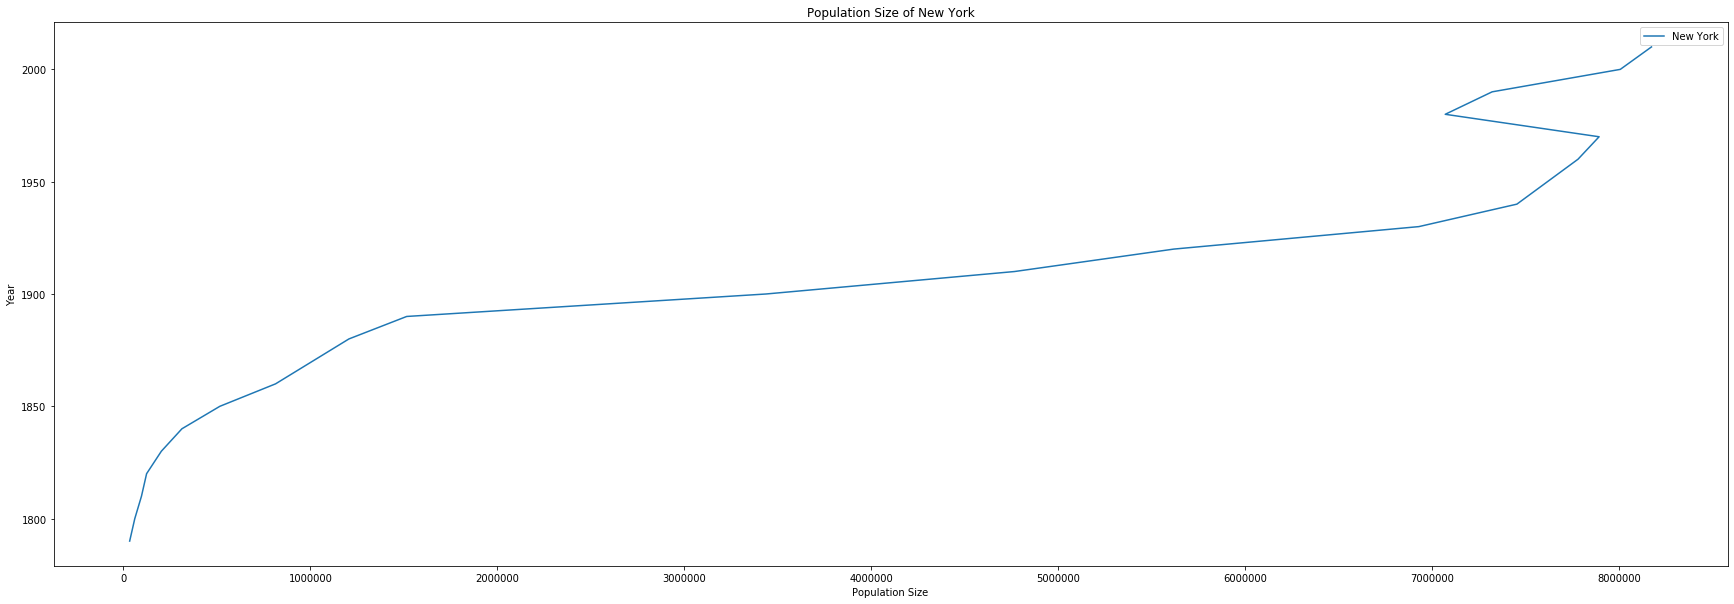

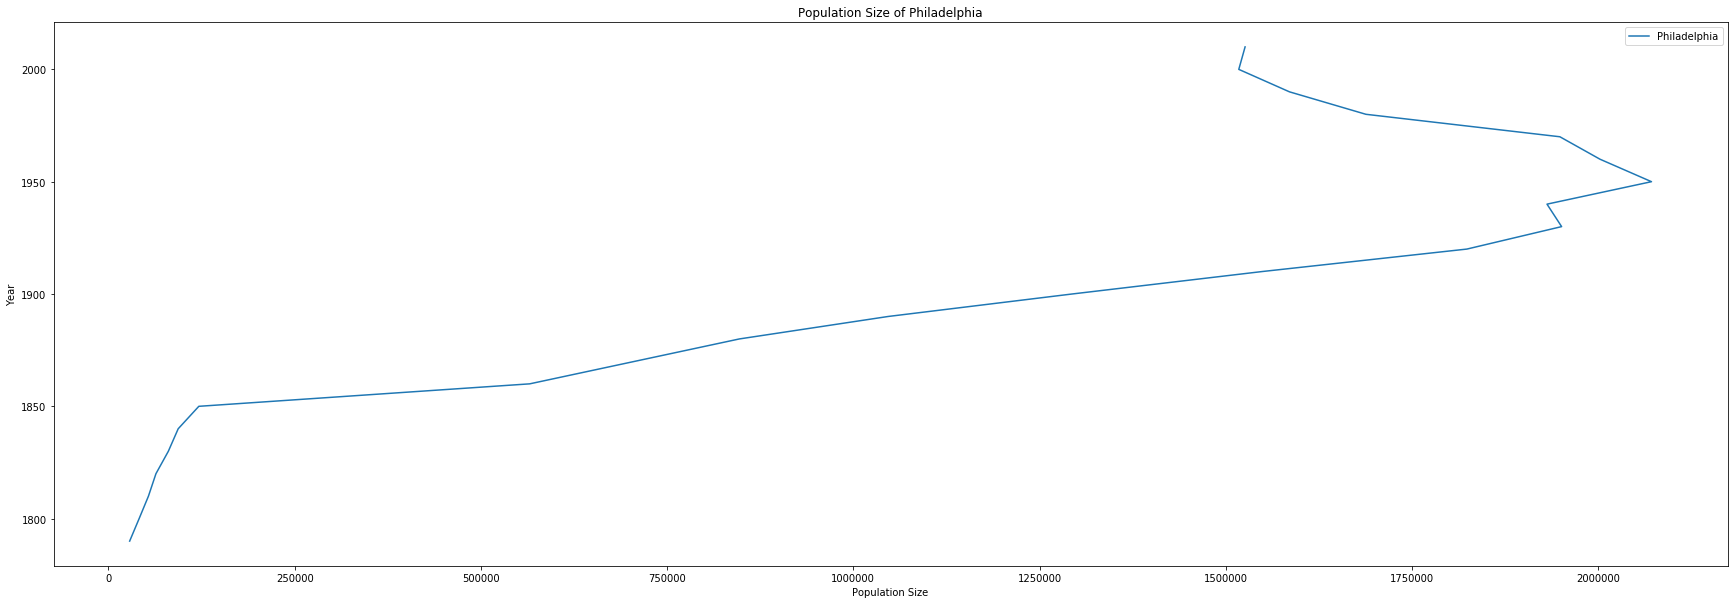

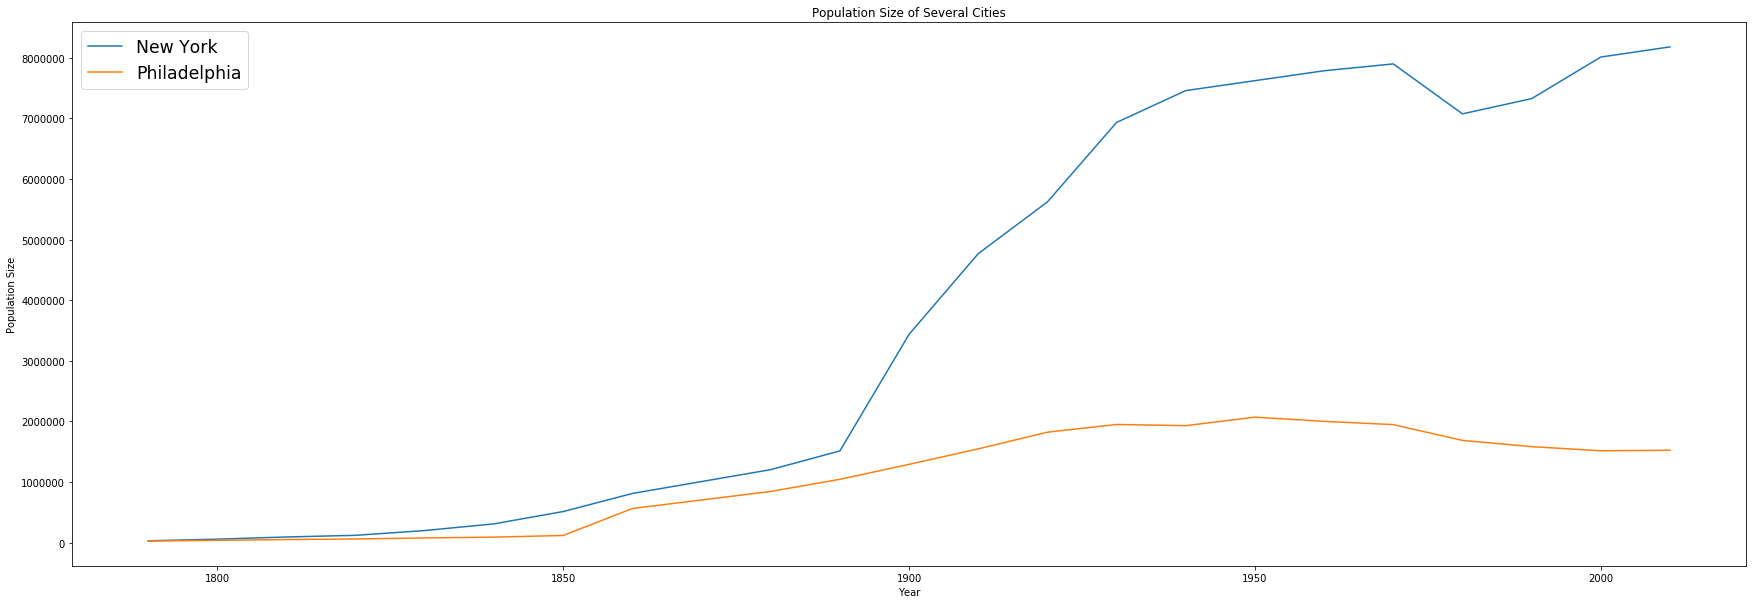

In [20]:
create_graph(create_dataframe(census_data, "New York"), "New York")
create_graph(create_dataframe(census_data, "Philadelphia"), "Philadelphia")
create_graphs(["New York", "Philadelphia"])

In [21]:
def graph_all_census():
    city = []
    census_data = US_census_data(2020)
    for place in census_data:
        city.append(place.getinfo()[0])

    create_graphs(city)
    

In [22]:
census_data

[New York-New York,
 Philadelphia-Pennsylvania,
 Boston-Massachusetts,
 Charleston-South Carolina,
 Baltimore-Maryland,
 Norwalk-Connecticut,
 Northern Liberties-Pennsylvania,
 Salem-Massachusetts,
 Newport-Rhode Island,
 Providence-Rhode Island,
 Marblehead-Massachusetts,
 Southwark-Pennsylvania,
 Gloucester-Massachusetts,
 Newburyport-Massachusetts,
 Portsmouth-New Hampshire,
 Sherburne-Massachusetts,
 Middleborough-Massachusetts,
 New Haven-Connecticut,
 South Kingstown-Rhode Island,
 Taunton-Massachusetts,
 Lancaster-Pennsylvania,
 Richmond-Virginia,
 Albany-New York,
 New Bedford-Massachusetts,
 Beverly-Massachusetts,
 Smithfield-Rhode Island,
 Danbury-Connecticut,
 Plymouth-Massachusetts,
 Norfolk-Virginia,
 North Kingstown-Rhode Island,
 Andover-Massachusetts,
 Rochester-New Hampshire,
 Petersburg-Virginia,
 Alexandria-Virginia,
 Farmington-Connecticut,
 Hartford-Connecticut,
 Londonderry-New Hampshire,
 Gilmanton-New Hampshire,
 Hudson-New York,
 Nantucket-Massachusetts,
 Schen

In [23]:
# test = US_census_data(2020)
# for item in test:
#     print(item.getinfo()[2])


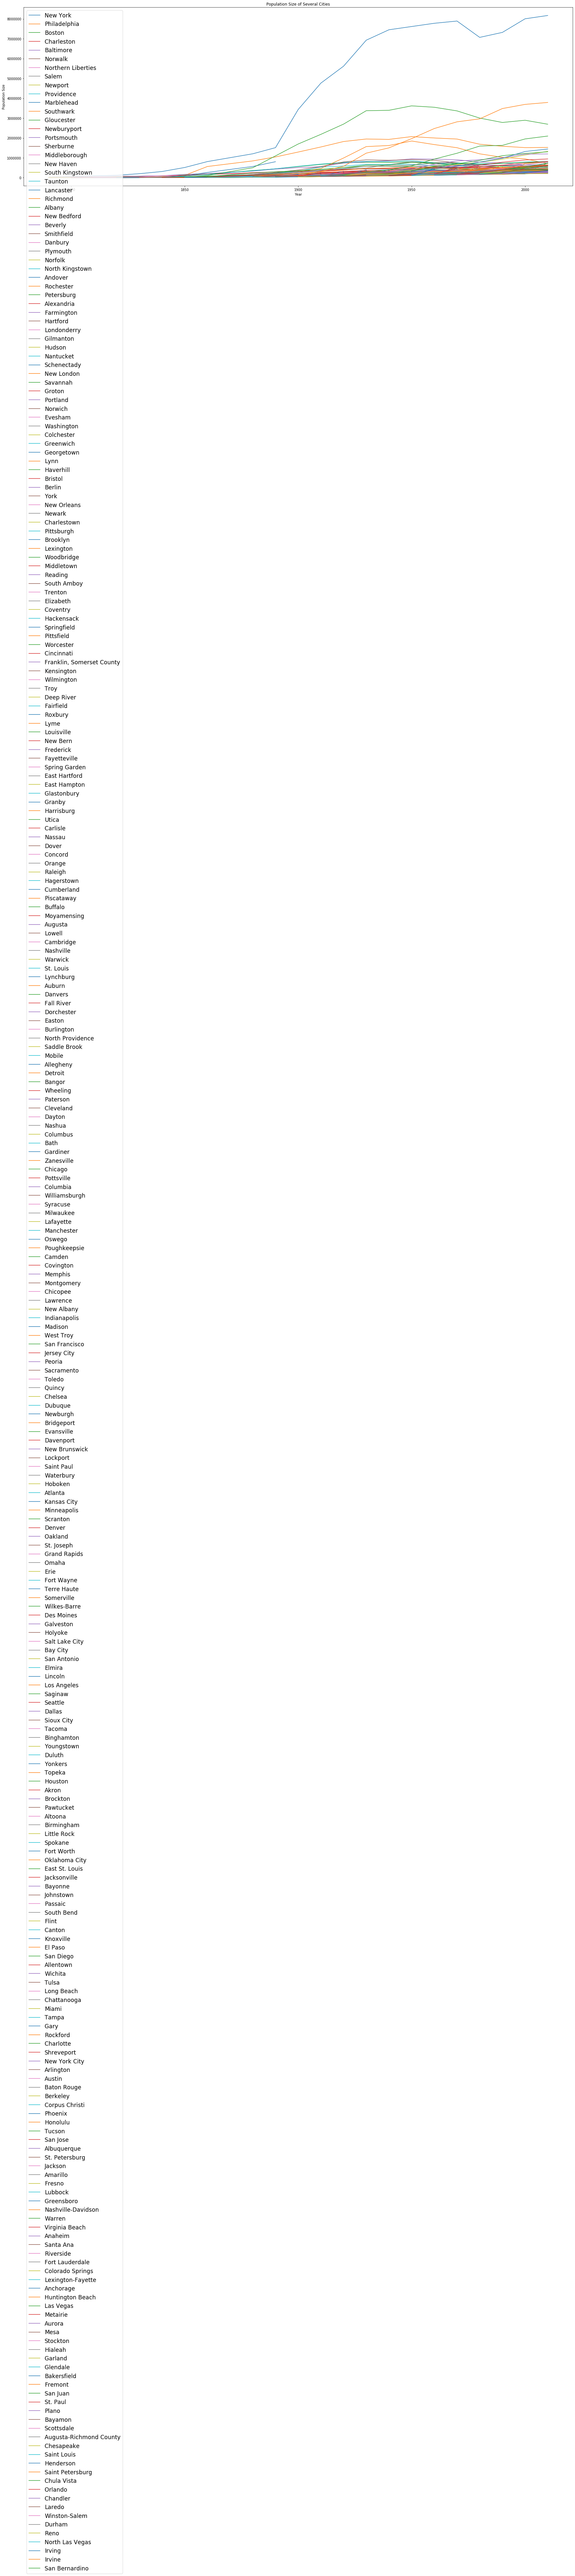

In [24]:
graph_all_census()

In [25]:
get_wikitable_source('https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_California').findAll('td')[3]


<td align="center">42,519
</td>

In [26]:
str(get_wikitable_source('https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_California').findAll('td')[3])

'<td align="center">42,519\n</td>'

In [27]:
str(get_wikitable_source("https://en.wikipedia.org/wiki/Help:Table").find('tr')) == \
'<tr>\n<th scope="col">Episode\n</th>\n<th scope="col">Date\n</th>\n<th scope="col">Summary\n</th></tr>'

True

In [28]:
type(get_wikitable_source('https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_California')) type

SyntaxError: invalid syntax (<ipython-input-28-e3efcbcb3d76>, line 1)